## Tic-Tac-Toe Agent - Submitted by Tim Kumar M B
​
An RL agent is built using Q-learning that learns to play Numerical Tic-Tac-Toe with odd numbers. The environment is playing randomly with the agent, i.e. its strategy is to put an even number randomly in an empty cell. The following is the layout of the notebook:
        - Defining epsilon-greedy strategy
        - Tracking state-action pairs for convergence
        - Define hyperparameters for the Q-learning algorithm
        - Generating episode and applying Q-update equation
        - Checking convergence in Q-values

#### Importing libraries

In [25]:
import collections
import numpy as np
import random
import pickle
import time
from matplotlib import pyplot as plt
import random

In [26]:
from TCGame_Env import TicTacToe
env = TicTacToe()

In [27]:
# Function to convert state array into a string to store it as keys in the dictionary
# states in Q-dictionary will be of form: x-4-5-3-8-x-x-x-x
#   x | 4 | 5
#   ----------
#   3 | 8 | x
#   ----------
#   x | x | x

def Q_state(state):

    return ('-'.join(str(e) for e in state)).replace('nan','x')

In [28]:
# Defining a function which will return valid (all possible actions) actions corresponding to a state

def valid_actions(state):

    valid_Actions = []
    
    valid_Actions = [i for i in env.action_space(state)[0]]
    return valid_Actions

In [29]:
# Defining a function which will add new Q-values to the Q-dictionary. 
def add_to_dict(state):
    state1 = Q_state(state)
    
    valid_act = valid_actions(state)
    if state1 not in Q_dict.keys():
        for action in valid_act:
            Q_dict[state1][action]=0

#### Epsilon-greedy strategy 

In [30]:
# Defining epsilon-greedy policy. 
max_epsilon = 1.0
min_epsilon = 0.001

def epsilon_greedy(state, time):
    epsilon = min_epsilon + (max_epsilon - min_epsilon) * np.exp(-0.000001*time)
    z = np.random.random()       
    if z > epsilon:
        action = max(Q_dict[Q_state(state)],key=Q_dict[Q_state(state)].get)   #Exploitation: this gets the action corresponding to max q-value of current state
    else:
        action = random.sample(valid_actions(state),1)[0]   
    
    return action

#### Tracking the state-action pairs for checking convergence

In [31]:
# Initialise Q_dictionary as 'Q_dict' and States_tracked as 'States_track' (for convergence)

Q_dict = collections.defaultdict(dict)

States_track = collections.defaultdict(dict)

In [32]:
# Initialise states to be tracked
def initialise_tracking_states():
    sample_q_values = [('x-5-x-x-x-x-8-x-x',(0,1)),
                       ('x-5-x-x-x-x-8-x-x',(2,9)),
                       ('x-x-x-x-6-x-x-x-5',(2,9)),
                       ('x-x-9-x-x-x-6-x-x',(1,5)),
                       ('x-5-x-2-x-x-4-7-x',(0,9)),
                       ('9-x-5-x-x-x-8-x-6',(1,1)),
                       ('2-5-x-x-6-x-x-3-x',(8,7)),
                       ('9-x-x-x-8-x-x-x-x',(2,5)),
                       ('9-x-x-x-x-x-x-x-2',(1,5)),
                       ('5-x-4-x-x-6-x-x-1',(4,9)),
                       ('2-6-x-x-x-x-3-7-x',(8,5)),
                       ('5-x-8-x-x-6-3-x-x',(3,7))]    
    for q_values in sample_q_values:
        state = q_values[0]
        action = q_values[1]
        States_track[state][action] = [] 

In [33]:
#Defining a function to save the Q-dictionary as a pickle file

def save_obj(obj, name ):
    with open(name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

In [34]:
def save_tracking_states():
    for state in States_track.keys():
        for action in States_track[state].keys():
            if state in Q_dict and action in Q_dict[state]:
                States_track[state][action].append(Q_dict[state][action])

In [35]:
initialise_tracking_states()

In [36]:
q_track={}
q_track['x-5-x-x-x-x-8-x-x']=[]
q_track['x-x-x-x-6-x-x-x-5']=[]
q_track['x-x-9-x-x-x-6-x-x']=[]
q_track['x-5-x-2-x-x-4-7-x']=[]
q_track['9-x-5-x-x-x-8-x-6']=[]
q_track['2-5-x-x-6-x-x-3-x']=[]
q_track['9-x-x-x-8-x-x-x-x']=[]
q_track['9-x-x-x-x-x-x-x-2']=[]
q_track['5-x-4-x-x-6-x-x-1']=[]
q_track['2-6-x-x-x-x-3-7-x']=[]
q_track['5-x-8-x-x-6-3-x-x']=[]

#### Define hyperparameters 

In [37]:
EPISODES = 6000000
LR = 0.15                
GAMMA = 1
threshold = 2500

### Q-update loop 

In [38]:
start_time = time.time()

for episode in range(EPISODES):
    reward=0
    curr_state = env.state
    add_to_dict(curr_state)
    is_terminal=False
    total_reward = 0
    
    
    while not(is_terminal):
        
        curr_action = epsilon_greedy(curr_state, episode)
        
        if Q_state(curr_state) in q_track.keys():
            q_track[Q_state(curr_state)].append(curr_action)
        
        
        next_state,reward,is_terminal=env.step(curr_state,curr_action)        
        
        curr_lookup=Q_state(curr_state)
        next_lookup=Q_state(next_state)
        
        if not(is_terminal):
            add_to_dict(next_state)
            max_next = max(Q_dict[next_lookup],key=Q_dict[next_lookup].get)
            max_q = Q_dict[next_lookup][max_next]
            
        else:
            max_q = 0
        
        Q_dict[curr_lookup][curr_action] += LR * ((reward + (GAMMA*(max_q))) - Q_dict[curr_lookup][curr_action]) 
        curr_state = next_state
    
        total_reward += reward      
        
    if ((episode+1) % threshold) == 0:   
        save_tracking_states()
        
    if ((episode+1) % 1000000) == 0:
        print('Processed %dM episodes'%((episode+1)/1000000))
        

elapsed_time = time.time() - start_time
save_obj(States_track,'States_tracked')   
save_obj(Q_dict,'Policy')

Processed 1M episodes
Processed 2M episodes
Processed 3M episodes
Processed 4M episodes
Processed 5M episodes
Processed 6M episodes


#### Check the Q-dictionary

In [58]:
len(Q_dict)

1252724

In [59]:
Q_dict['5-x-8-x-x-6-3-x-x']

{(1, 1): -0.15,
 (1, 7): -1.425,
 (1, 9): -0.15,
 (3, 1): -0.15,
 (3, 7): 6.794229117187499,
 (3, 9): 0,
 (4, 1): -1.5,
 (4, 7): 0,
 (4, 9): 0,
 (7, 1): 0,
 (7, 7): -0.27749999999999997,
 (7, 9): 0,
 (8, 1): 0,
 (8, 7): 0,
 (8, 9): -0.15}

#### Check the states tracked for Q-values convergence

In [60]:
with open('States_tracked.pkl', 'rb') as handle:
    States_track = pickle.load(handle) 

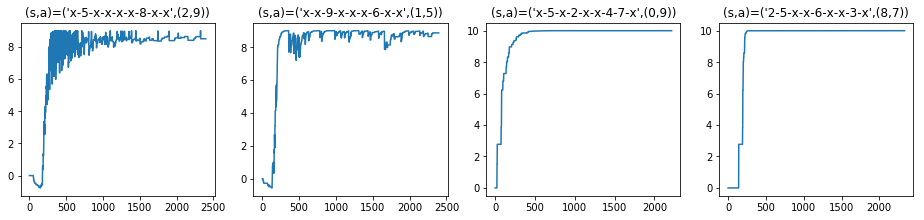

In [61]:
plt.figure(0, figsize=(16,7))
plt.subplot(241)
t1=States_track['x-5-x-x-x-x-8-x-x'][(2,9)]
plt.title("(s,a)=('x-5-x-x-x-x-8-x-x',(2,9))")
plt.plot(np.asarray(range(0, len(t1))),np.asarray(t1))

plt.subplot(242)
t2=States_track['x-x-9-x-x-x-6-x-x'][(1,5)]
plt.title("(s,a)=('x-x-9-x-x-x-6-x-x',(1,5))")
plt.plot(np.asarray(range(0, len(t2))),np.asarray(t2))

plt.subplot(243)
t3=States_track['x-5-x-2-x-x-4-7-x'][(0,9)]
plt.title("(s,a)=('x-5-x-2-x-x-4-7-x',(0,9))")
plt.plot(np.asarray(range(0, len(t3))),np.asarray(t3))

plt.subplot(244)
t4=States_track['2-5-x-x-6-x-x-3-x'][(8,7)]
plt.title("(s,a)=('2-5-x-x-6-x-x-3-x',(8,7))")
plt.plot(np.asarray(range(0, len(t4))),np.asarray(t4))

plt.show()

### Epsilon - decay check

In [62]:
max_epsilon = 1.0
min_epsilon = 0.001
time = np.arange(0,6000000)
epsilon = []
for i in range(0,6000000):
    epsilon.append(min_epsilon + (max_epsilon - min_epsilon) * np.exp(-0.000001*i))

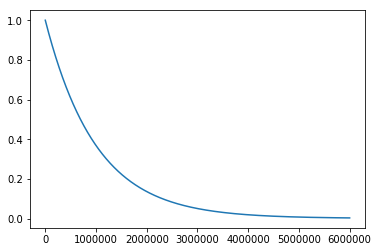

In [63]:
plt.plot(time, epsilon)
plt.show()